# Stock market clustering

_Data Structures and Algorithms_

_Imperial College London_


---
This notebook is divided into three parts. In the first part, we will work on `pandas` data analysis. In the second part, we will implement a clustering algorithm to group companies based on their stock price movements. In the final part, we will explore ways to extend and improve this analysis. 

---

## Part 1: Pandas

The repo comes with two files containing company data:
- `SP_500_firms.csv` with firm and ticker names
- `SP_500_close_2015.csv` with stock price data for 2015

Let's first load up this data.

In [1]:
# Load data into Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
import pylab as pl


def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            #print(row)
            d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)
print(price_data.shape)
price_data.head()
names = price_data.columns

(252, 496)


### 1: Returns

The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

The returns for all the stocks in `price_data` are calculated below.

In [2]:
# Calculate company returns in this cell
daily_return = price_data.pct_change(1) # returns formula
daily_return.dropna(inplace=True) # NaN removal

daily_return.head() # visualisation of the result

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.022553,0.000223,-0.018819,-0.016884,-0.013910,-0.024021,-0.004976,-0.013181,-0.028467,-0.013514,...,-0.011351,-0.021818,-0.018349,0.006096,-0.062237,-0.020729,-0.020318,0.037304,-0.037469,-0.006003
2015-01-06,-0.010664,-0.011356,-0.004950,-0.007213,-0.018640,-0.012526,-0.020145,-0.000703,-0.022539,0.001484,...,0.005321,-0.013383,-0.014486,0.004905,-0.005881,0.001628,-0.012274,-0.008477,-0.038193,-0.009756
2015-01-07,0.007249,0.008108,0.040417,0.020989,-0.021561,0.017729,0.008223,0.021489,0.001537,0.020061,...,0.008635,0.012811,0.000474,0.000574,0.007887,-0.012599,0.033138,0.024870,0.009546,0.020643
2015-01-08,0.023967,0.020554,0.010459,0.015249,0.009969,0.034985,0.025453,0.008765,0.015349,0.032406,...,0.011599,0.027530,0.022275,0.016356,0.007546,0.033752,0.017420,0.010617,0.013994,0.015399
2015-01-09,-0.012284,-0.010508,-0.027355,-0.001113,-0.018182,0.066901,-0.014811,-0.005089,-0.024943,-0.014612,...,-0.012285,-0.005793,-0.000927,0.012987,-0.018863,-0.010153,-0.001767,-0.014424,-0.027975,0.001584


### 1.1: Highest and lowest daily returns

We find the 10 highest daily returns amongst all companies.
We repeat this operation with the lowest daily returns.

In [19]:
def get_daily_10_largest_and_lowest():
    columns = [1,2,3,4,5,6,7,8,9,10]
    large_val_df = pd.DataFrame(np.nan, index=daily_return.index, columns=columns)
    small_val_df = pd.DataFrame(np.nan, index=daily_return.index, columns=columns)

    for idx,row in daily_return.iterrows():
        if len(row.nlargest(10).index.tolist()) == 10:
            large_val_df.loc[idx] = row.nlargest(10).index.tolist()

        if len(row.nsmallest(10).index.tolist()) == 10:
            small_val_df.loc[idx] = row.nsmallest(10).index.tolist()
    print(large_val_df)
    print(small_val_df)

def get_daily_n_largest_ever(n, df):


    copy_df = df.copy(deep=True)
    spacer = "-"*100
    for i in range(n):
        max_val_idx = np.argmax(copy_df.values)
        row_max = max_val_idx//copy_df.shape[1]
        col_max = max_val_idx%copy_df.shape[1]
        
        print("|max #{} = {} \t| ({}, {}) \t| stock_name: {} \t| TimeStamp: {}|\n{}".format(i+1, copy_df.iloc[row_max, col_max], col_max, row_max, copy_df.columns.values[col_max], copy_df.index.values[row_max], spacer))
        
        copy_df.iloc[row_max, col_max] = 0

def get_daily_n_lowest_ever(n, df):


    copy_df = df.copy(deep=True)
    spacer = "-"*100
    for i in range(n):
        max_val_idx = np.argmin(copy_df.values)
        row_max = max_val_idx//copy_df.shape[1]
        col_max = max_val_idx%copy_df.shape[1]
        
        print("|min #{} = {} \t| ({}, {}) \t| stock_name: {} \t| TimeStamp: {}|\n{}".format(i+1, copy_df.iloc[row_max, col_max], col_max, row_max, copy_df.columns.values[col_max], copy_df.index.values[row_max], spacer))
        
        copy_df.iloc[row_max, col_max] = 1
        
get_daily_n_largest_ever(10, daily_return)
print("\n\n")
get_daily_n_lowest_ever(10, daily_return)


|max #1 = 0.28661620146634803 	| (196, 163) 	| stock_name: FCX 	| TimeStamp: 2015-08-27|
----------------------------------------------------------------------------------------------------
|max #2 = 0.25899875928904104 	| (482, 116) 	| stock_name: WMB 	| TimeStamp: 2015-06-22|
----------------------------------------------------------------------------------------------------
|max #3 = 0.2553606011287868 	| (441, 196) 	| stock_name: TRIP 	| TimeStamp: 2015-10-14|
----------------------------------------------------------------------------------------------------
|max #4 = 0.23760024217831144 	| (214, 17) 	| stock_name: HAR 	| TimeStamp: 2015-01-29|
----------------------------------------------------------------------------------------------------
|max #5 = 0.23225369422122033 	| (367, 213) 	| stock_name: QRVO 	| TimeStamp: 2015-11-06|
----------------------------------------------------------------------------------------------------
|max #6 = 0.22838912579834925 	| (485, 188) 	| sto

### Interpretations

The FCX reached the highest daily return on 2015-08-27, which is 0.2886616. This is because FCX announced further reduction in expenditure in line with market conditions, which may increase free cash flow. And every quarter, the company will have a strategy meeting for investors to summarise the previous quarter's performance, and if the quarter has been good, the company will have a presentation, so the share price goes up that day.



### 1.2: Highest and lowest yearly returns

Find the 10 highest yearly returns amongst all companies.

Repeat with the lowest yearly returns.

In [20]:
"""
Note:

The data starts in 2015-01-02 and ends in 2015-12-31
Hence we can only compute one yearly return

We used the arithmetic average return
"""
yearly_returns = (price_data.loc[price_data.index[-1]]-price_data.loc[price_data.index[0]])/price_data.loc[price_data.index[0]]
yearly_returns = yearly_returns.to_frame()
stack = yearly_returns.stack()
stack = stack.to_frame()
print('10 highest yearly returns are : \n',stack.nlargest(10,0), '\n 10 lowest yearly returns are : \n', stack.nsmallest(10,0))

10 highest yearly returns are : 
                0
NFLX 0  1.294549
AMZN 0  1.190750
ATVI 0  0.942684
AYI  0  0.676443
NVDA 0  0.664514
GPN  0  0.600933
HRL  0  0.559016
EXR  0  0.544469
VRSN 0  0.527540
RAI  0  0.497837 
 10 lowest yearly returns are : 
                0
CHK  0 -0.769785
SWN  0 -0.738314
FCX  0 -0.703792
KMI  0 -0.632032
MU   0 -0.592518
NRG  0 -0.559234
RRC  0 -0.553864
MRO  0 -0.546383
MUR  0 -0.538541
WYNN 0 -0.516602


### 1.3: Highest and lowest volatilities

Find the 10 highest yearly volatilities (standard deviations) amongst all companies.

Repeat with the lowest volatilities.

In [22]:
yearly_returns = (price_data.loc[price_data.index[-1]]-price_data.loc[price_data.index[0]])/price_data.loc[price_data.index[0]]
yearly_returns = yearly_returns.to_frame()
stack = yearly_returns.stack()
stack = stack.to_frame()
print('10 highest yearly returns are : \n',stack.nlargest(10,0), '\n 10 lowest yearly returns are : \n', stack.nsmallest(10,0))

10 highest yearly returns are : 
                0
NFLX 0  1.294549
AMZN 0  1.190750
ATVI 0  0.942684
AYI  0  0.676443
NVDA 0  0.664514
GPN  0  0.600933
HRL  0  0.559016
EXR  0  0.544469
VRSN 0  0.527540
RAI  0  0.497837 
 10 lowest yearly returns are : 
                0
CHK  0 -0.769785
SWN  0 -0.738314
FCX  0 -0.703792
KMI  0 -0.632032
MU   0 -0.592518
NRG  0 -0.559234
RRC  0 -0.553864
MRO  0 -0.546383
MUR  0 -0.538541
WYNN 0 -0.516602


### Correlations

Analysts often care about the _correlation_ of stock prices between firms. Correlation measures the statistical similarity between the two prices' movements. If the prices move very similarly, the correlation of their _returns_  is close to 1. If they tend to make exactly the opposite movements (ie one price moves up and the other one down), the correlation is close to -1. If there is no clear statistical relationship between the movements of two stock prices, the correlation in their returns is close to zero.

For a sample of stock price returns $x,y$ with observations for $n$ days, the correlation $r_{xy}$ between $x$ and $y$ can be calculated as:

$$
r_{xy} = \frac{\sum x_i y_i - n \bar{x}\bar{y}}{ns_x s_y} = {\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.
$$

Here $\bar{x}$ refers to the average value of $x$ over the $n$ observations, and $s_x$ to its standard deviation.

Based on time series of the stock returns we just computed, we can calculate a  correlation value for each pair of stocks, for example between MSFT (Microsoft) and AAPL (Apple). This gives us a measure of the similarity between the two stocks in this time period.


Below are calculated all correlations between companies. 

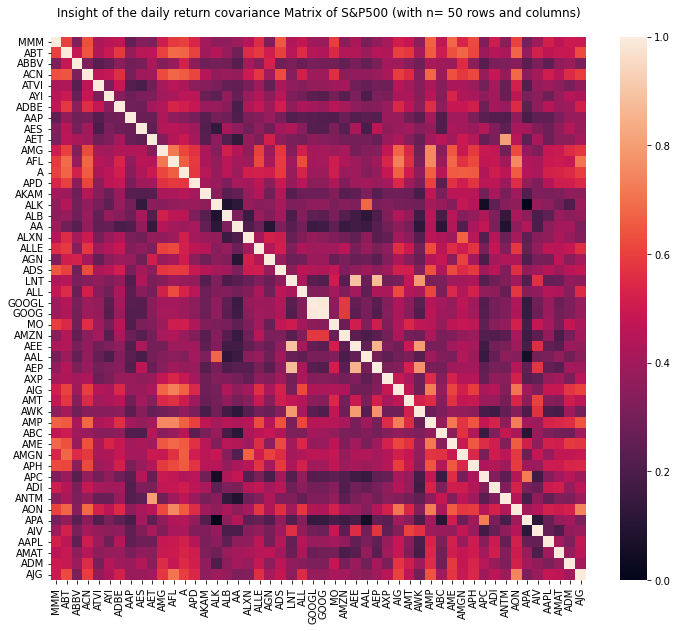

In [6]:
correl = daily_return.corr()

def show_df_heatmap_for_N_cols_and_rows(df, N=50):
    fig=plt.figure(figsize=(12,10))
    sns.heatmap(df.iloc[:N , :N])
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90) 
    plt.title("Insight of the daily return covariance Matrix of S&P500 (with n= {} rows and columns)".format(N), pad=20)
    plt.show()
show_df_heatmap_for_N_cols_and_rows(correl)
# correl.head()


### 2.1

Next, analyse the correlations between the companies:
- Define functions to print out the $n$ top and bottom correlated companies for any given company. 
- Use the functions to study the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google. Comment on the results. 


The 10 most correlated stocks for AMZN are:
GOOGL    0.585553
GOOG     0.584337
SBUX     0.571951
V        0.560704
MA       0.538708
JNPR     0.531443
MSFT     0.524403
FB       0.500222
HSIC     0.479651
IPG      0.471228
Name: AMZN, dtype: float64


The 10 least correlated stocks for AMZN are:
SRCL    0.056451
RIG     0.060162
SWN     0.082376
TRIP    0.087684
WFM     0.090700
DO      0.091286
HP      0.106780
KLAC    0.106865
KSS     0.107043
NRG     0.126722
Name: AMZN, dtype: float64


The 10 most correlated stocks for MSFT are:
MMC      0.604549
PG       0.604204
MA       0.590886
ADP      0.589445
SBUX     0.583705
BRK-B    0.583071
CA       0.580201
ACN      0.577228
AMP      0.577016
FISV     0.576048
Name: MSFT, dtype: float64


The 10 least correlated stocks for MSFT are:
SRCL    0.028887
NRG     0.090761
RIG     0.113785
SWN     0.114787
URBN    0.128788
KSS     0.130144
RRC     0.135989
KORS    0.143060
KMI     0.148986
DO      0.151773
Name: MSFT, dtype: float64


The 1

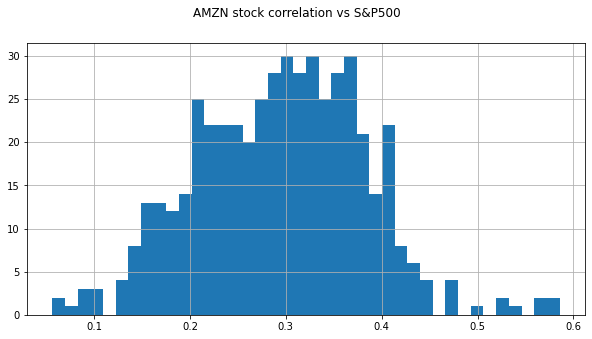

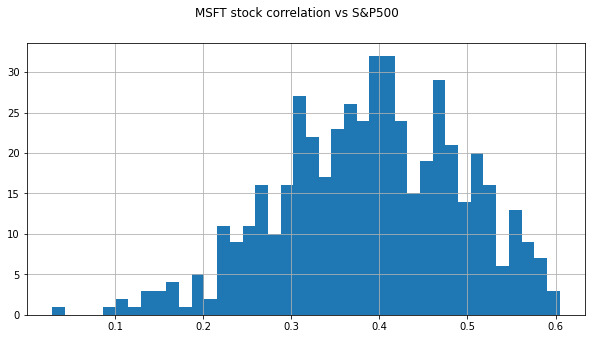

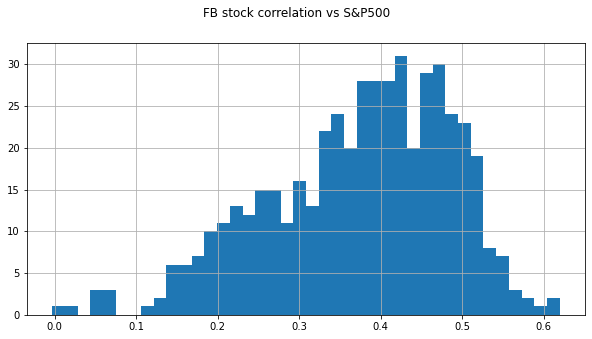

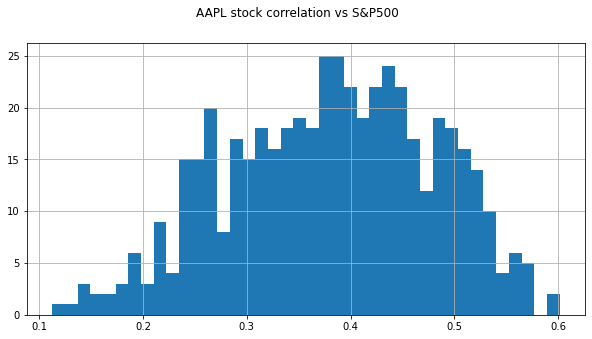

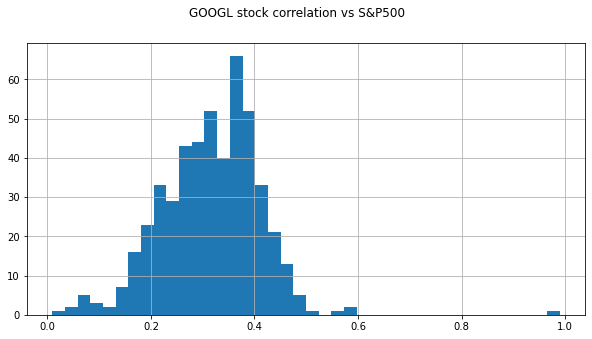

In [7]:
"""
Note: data is using the old stock ticker of Facebook.
With up-to-date stock data, it sould be "META", not "FB".

Note that we have removed the duplicate values to avoid having a correlation equal to 1.
It can be observed though that GOOGL has a stock with a correlation of almost 1.
Looking at the heatmap, we can deduct that the former stock is highly correlated with GOOG,
which, in this dataset, is presented as a different stock. 
"""

def n_top_and_bot_corr(company_name, n):
    """
    Parameters:
        company_name (string): Company symbol/ticker
        n: number of top and bottom correlated companies that will be fetched
    
    Prints: 
        n, company_name, top_n_correlated_companies
        n, company_name, bot_n_correlated_companies
        
    Returns:
        top_n_correlated_companies (Series): Series of top n most corralted companies indexed by company symbol
        bot_n_correlated_companies (Series): Series of bot n most corralted companies indexed by company symbol
    """
    # Checks if company name exist
    if company_name not in comp_names:
        print("ERROR: Invalid company name. The ticket {} does not exist in the studied database".format(company_name))
        return
    correl = daily_return.corr().loc[company_name]
    correl.drop(labels=company_name, inplace=True)

    fig=plt.figure(figsize=(10,5))
    correl.hist(bins=40)
    title = company_name + " stock correlation vs S&P500"
    pl.suptitle(title)
    
    top_n_correlated_companies = correl.nlargest(n)
    bot_n_correlated_companies = correl.nsmallest(n)
    print("\nThe {} most correlated stocks for {} are:\n{}\n".format(n, company_name, top_n_correlated_companies))
    print("\nThe {} least correlated stocks for {} are:\n{}\n".format(n, company_name, bot_n_correlated_companies))

    return top_n_correlated_companies, bot_n_correlated_companies

for ticker in ["AMZN", "MSFT", "FB", "AAPL", "GOOGL"]:
    n_top_and_bot_corr(ticker, 10)

## Part 2:  Clustering

In this part of the project, we will develop a clustering algorithm to study the similarity of different stocks. 

The general purpose of clustering analysis is dividing a set of objects into groups that are somehow "similar" to each other. It is a widespread tool used for exploratory data analysis in diverse fields in both science and business. For example, in marketing analytics, cluster analysis is employed to group consumers into segments based on their characteristics or _features_, such as age, post code, purchase history, etc. These features are somehow aggregated to compare the similarity between consumers. Based on this similarity, a clustering algorithm then divides the consumers into segments.

We will apply this idea on stock market data to identify groups of stocks that perform similarly over time. There are many reasons for grouping stocks together, such as analysing trading strategies, risk management, or simply presenting stock market information. Publicly traded companies are often grouped together by simple features such as the industry they operate in (eg tech companies or pharma companies), but here we'll take a data-driven approach, grouping together stocks that perform similarly over time. 

Cluster analysis is an umbrella term for many different algorithmic approaches. Here we'll develop one that's based on the concept of `greedy` algorithm design, specified below. We'll also have the opportunity to explore other approaches using Python libraries.

What is a good measure for stocks "performing similarly" to use for clustering. Let's use the one we just calculated: correlations in their returns. How can we use this similarity information for clustering? We now have access to all correlations between stock returns in S&P 500. We can think of this as a _graph_ as follows. The _nodes_ of the graph are the stocks (eg MSFT and AAPL). The _edges_ between them are the correlations, which we have just calculated between each stock, where the value of the correlation is the edge weight. Notice that since we have the correlations between all companies, this is a _dense_ graph, where all possible edges exist.

We thus have a graph representing pairwise "similarity" scores in correlations, and we want to divide the graph into clusters. There are many possible ways to do this, but here we'll use a _greedy_ algorithm design. The algorithm is as follows:

1. Sort the edges in the graph by their weight (ie the correlation), pick a number $k$ for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat $k$ times:
	1. Pick the graph edge with the highest correlation
	2. Combine the two sets containing the source and the destination of the edge
	3. Repeat with the next-highest weight edge
4. Return the remaining sets after the $k$ iterations 

What does the algorithm do? It first initializes a graph with no connections, where each node is in a separate set. Then in the main loop, it runs through the $k$ highest-weighted edges, and adds connections at those edges. This leads to sets being combined (or "merged"). The result is "groups" of stocks determined by the highest correlations between the stock returns. These are our stock clusters.

For example, suppose that the toy graph below represents four stocks: A,B,C,D and their return correlations. Suppose we pick $k=2$ and run the algorithm. 

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


The algorithm would begin by initializing four separate sets of one node each: {A}, {B}, {C}, {D}. It would then first connect C and D because of their correlation 0.95, resulting in just three sets: {A}, {B}, and {C,D}. Then it would connect A and B, resulting in two sets of two nodes each: {A,B}, and {C,D}. These would be our clusters for $k=2$.

### Question 3: Implementing the algorithm

Our task is to implement the clustering algorithm using the functions below. First, for convenience in implementing the algorithm, let's create a list of the correlations from the pandas data. 

In [8]:
def create_correlation_list(correl):
    """
    Creates a list of correlations from a pandas dataframe of correlations
    
    Parameters:
        correl: pandas dataframe of correlations
    
    Returns:
        list of correlations containing tuples of form (correlation, ticker1, ticker2)
    """
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L
correl = daily_return.corr()
edges = create_correlation_list(correl)
for e in edges[:10]:
    print(e)

(0.5986661640297384, 'MMM', 'ABT')
(0.32263699601940277, 'MMM', 'ABBV')
(0.6320593488560183, 'MMM', 'ACN')
(0.41855006701119996, 'MMM', 'ATVI')
(0.45089749571328575, 'MMM', 'AYI')
(0.46875484430451547, 'MMM', 'ADBE')
(0.257131652175443, 'MMM', 'AAP')
(0.3353779674122444, 'MMM', 'AES')
(0.3173737409967593, 'MMM', 'AET')
(0.5059306055816823, 'MMM', 'AMG')


Next, let's turn to the algorithm itself. Consider the example above, repeated here.

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


Suppose we pick $k=3$ and have sorted the edge list in step 1 of the algorithm. How should we represent the clusters in step 2? One great way is to use a dictionary where each _key_ is a node, and each _value_ is another node that this node "points to". A cluster is then a chain of these links, which we represent as a dictionary.

In step 2 of the algorithm, we start with four nodes that point to themselves, ie the dictionary `{'A':'A','B':'B','C':'C','D':'D'}`. When a node points to itself, it ends the chain. Here the clusters are thus just the nodes themselves, as in the figure below.

<img src="cluster1.png" alt="cluster1" style="width: 200px;"/>


Let's walk through the algorithm's next steps. We first look at the highest-weight edge, which is between C and D. These clusters will be combined. In terms of the dictionary, this means that one of them will not point to itself, but to the other one (here it does not matter which one). So we make the dictionary at `C` point to `D`. The dictionary becomes `{'A':'A','B':'B','C':'D','D':'D'}`.

<img src="cluster2.png" alt="cluster2" style="width: 200px;"/>


The next highest correlation is between A and B, so these clusters would be combined. The dictionary becomes `{'A':'B','B':'B','C':'D','D':'D'}`.

<img src="cluster3.png" alt="cluster3" style="width: 200px;"/>


The third highest correlation is between C and B. Let's think about combining these clusters using the dictionary we have. Looking up `B`, we get `B`: the node B is in the _bottom_ of the chain representing its cluster. But when we look up `C`, it points to `D`. Should we make `C` point to `B`? No - that would leave nothing  pointing at `D`, and `C` and `D` should remain connected! We could perhaps have `C` somehow point at both nodes, but that could become complicated, so we'll do the following instead. We'll follow the chain to the bottom. In the dictionary, we look up `C` and see that it points to `D`. We then look up `D` which points to itself, so `D` is the _bottom_ node. We then pick one of the bottom nodes `B` and `D`, and make it point to the other. We then have the dictionary `{'A':'B','B':'B','C':'D','D':'B'}`, and the corresponding clustering in the figure below.

<img src="cluster4.png" alt="cluster4" style="width: 200px;"/>


In other words, we'll keep track of clusters in a dictionary such that **each cluster has exactly one bottom node**. To do this, we need a mechanism for following a cluster to the bottom. We'll implement this in the function `find_bottom` below. The function takes as input a node and a dictionary, and runs through the "chain" in the dictionary until it finds a bottom node pointing to itself.

The other thing we'll need to do is combine clusters by connecting two nodes. This means taking the two nodes, finding the bottom node for each node's cluster, and making one point to the other. We'll implement this in the function `merge_clusters` below.

Finally, We'll need to set up the algorithm by sorting the correlations, and then looping through this merging $k$ times. We'll implement this in the function `cluster_correlations` below. This completes the algorithm.

But there is one more thing. If we only keep track of a dictionary like `{'A':'B','B':'B','C':'D','D':'B'}`, how do WE actually find the clusters from the dictionary? A convenient way is to store some extra information: the "starting nodes" of each cluster to which no other node links. For example, above these "starting nodes" would include all nodes `A,B,C,D` in the beginning, but only `A` and `C` in the end. If we keep track of these, we can then write a function that starts from each such remaining "starting node", works through to the bottom, and creates the cluster along the way. We'll implement this in the function `construct_sets` below.

### Intermediary results

We can load a pre-computed set of results up to this point using the following commands.

In [9]:
# Load intermediary results from a "pickle" file
# We can use these with our algorithm below
import pickle
file_name = 'cluster_correlations'
with open(file_name, "rb") as f:
    correl = pickle.load(f)
    edges = pickle.load(f)

firms = list(correl.columns)
print(firms[:10])
# sorted(edges, reverse=True)[:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET']


### Clustering implementation

Complete the following functions to implement the clustering algorithm.

In [10]:
"""
Algo Reminder:

1. Sort the edges in the graph by their weight (ie the correlation), 
    pick a number  𝑘  for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat  𝑘  times:
    a. Pick the graph edge with the highest correlation
    b. Combine the two sets containing the source and the destination of the edge
    c. Repeat with the next-highest weight edge
4. Return the remaining sets after the  𝑘  iterations
"""

def find_bottom(node, next_nodes):
    """
    Find the "bottom" of a cluster starting from node in dictionary next_nodes

    Parameters:
        node: starting node
        next_nodes: dictionary of node connections

    Returns:
        the bottom node in the cluster
    """
    key = node
    atr = next_nodes[node]

    while True:
#         print("key: {} || atr: {}\n{}:{}\n\n".format(key, atr,key, atr))
#         print("{} -> {}".format(key, atr))
        if key == atr:
            break
        
        key = atr
        atr = next_nodes[key]
        
    return key

def merge_sets(node1, node2, next_nodes, set_starters):
    """
    Merges the clusters containing node1, node2 using the connections dictionary next_nodes.
    Also removes any bottom node which is no longer a "starting node" from set_starters.

    Parameters:
        node1: first node the set of which will be merged
        node2: second node the set of which will be merged
        next_nodes: dictionary of node connections
        set_starters: set of nodes that "start" a cluster

    Returns:
        does this function need to return something?
        
        answer: No, because dictionnaries and sets are mutable so
                we will change the inputs and don't need outputs
    """
    # node1 = C
    # node2 = D
    bot1 = find_bottom(node1, next_nodes) # C
    bot2 = find_bottom(node2, next_nodes) # D
    next_nodes[bot1] = bot2
    if bot2 in set_starters:
        set_starters.remove(bot2) 
    
#     if (node2 in set_starters) and :
#         set_starters.remove(node2)
#     next_nodes[node1] = node2

    
def cluster_correlations(edge_list, firms, k=200):
    """
    A mystery clustering algorithm
     
    Parameters:
         edge_list - list of edges of the form (weight,source,destination)
         firms - list of firms (tickers)
         k - number of iterations of algorithm

    Returns:
         next_nodes - dictionary to store clusters as "pointers"
            - the dictionary keys are the nodes and the values are the node in the same cluster that the key node points to
         set_starters - set of nodes that no other node points to (this will be used to construct the sets below)

    Algorithm:
         1 sort edges by weight (highest correlation first)
         2 initialize next_nodes so that each node points to itself (single-node clusters)
         3 take highest correlation edge
            check if the source and destination are in the same cluster using find_bottom
            if not, merge the source and destination nodes' clusters using merge_sets
         4 if max iterations not reached, repeat 3 with next highest correlation
         (meanwhile also keep track of the "set starters" ie nodes that have nothing pointing to them for later use)
    """
    # Sort edges
    sorted_edges = sorted(edge_list, reverse=True)
    # Initialize dictionary of pointers
    next_nodes = {node: node for node in firms}
    # Keep track of "starting nodes", ie nodes that no other node points to in next_nodes
    set_starters = {node for node in firms}

    """
    3. Repeat  𝑘  times:
        a. Pick the graph edge with the highest correlation
        b. Combine the two sets containing the source and the destination of the edge
        c. Repeat with the next-highest weight edge
    4. Return the remaining sets after the  𝑘  iterations
    """
    # Loop k times
    for i in range(k):
        # Pick the graph edge with the highest correlation
        highest_corr = sorted_edges[i]
        
        node1 = highest_corr[1]
        node2 = highest_corr[2]
        
        # check if the source and destination are in the same cluster using find_bottom
        # if not, merge the source and destination nodes' clusters using merge_sets
        if find_bottom(node1, next_nodes) != find_bottom(node2, next_nodes):        
            # Combine the two sets containing the source and the destination of the edge
            merge_sets(node1, node2, next_nodes, set_starters)
        
        
    return set_starters, next_nodes

Once we've run the algorithm, we'll need to construct the clusters. We can use the function below to do so.

In [11]:
def construct_sets(set_starters, next_nodes):
    """
    Constructs sets (clusters) from the next_nodes dictionary
    
    Parameters:
        set_starters: set of starting nodes 
        next_nodes: dictionary of connections
    
    Returns: 
        dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    """
    # Initialise an empty dictionary 
    all_sets = dict()
    
    # Loop:
    # Start from each set starter node
    # Construct a "current set" with all nodes on the way to bottom node
    # If bottom node is already a key of all_sets, combine the "current set" with the one in all_sets,
    # Otherwise add "current set" to all_sets
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

edge_list = edges
set_starters, next_nodes = cluster_correlations(edge_list, firms,50000)
all_clusters = construct_sets(set_starters,next_nodes)
len_all_clusters = []
for c in all_clusters:
    len_all_clusters.append(len(c))
print(len(len_all_clusters))

3


### Question 3.2: analysing the results

After we have implemented the algorithm in Python, add cells below answering the following questions:
- Do some detective work: what is the algorithm that we've implemented called? In what other graph problem is it often used? How are the problems related? (Hint: the algorithm is mentioned on the Wikipedia page for greedy algorithms.)
- Run the algorithm and present the results formatted in a useful way. 
- Discuss the results for different values of $k$.  
- Do the resulting clusters "make sense"? (we may need to search online what the companies do.) Verify that the stocks in our clusters perform similarly by plotting the returns and the (normalised) stock prices for some of the clusters.
- We may use graphs etc. to present our results.

### interpretations 
For the company Amazon, we found that the most related companies are Alphabet Inc Class A and Alphabet Inc Class C which belong to the information technology industry. They have a correlation to Amazon of 0.585553 and 0.584337 respectively.

 

For the company Microsoft, we found that the most related companies are Marsh & McLennan and Procter & Gamble which belong to the Financials and Consumer Staples industries respectively. They have a correlation to Microsoft of 0.604549 and 0.604204 respectively.

 

For the company Facebook, we found that the most related companies are Fiserv Inc and Mastercard Inc. which belong to the Information Technology industry. They have a correlation to Facebook of 0.6619667 and 0.617659 respectively.

 

For the company Apple, we found that the most related companies are Illinois Tool Works and Northrop Grumman Corp. which belong to the Industrials industry. They have a correlation to Apple of 0.601265 and 0.589368 respectively.

 

For the company Google, we found that the most related companies are Alphabet Inc Class C and Facebook which belong to the Information Technology industry. They have a correlation to Google of 0.989365 and 0.586548 respectively.

 

The results show that the stocks prices in the same or similar industries are highly correlated to each other, for example, Alphabet Inc Class C, Alphabet Inc Class A and Facebook. We are expected to see this result as stocks in the same industry should have the same trend.

## Part 3: 

### In-depth analysis

***

in the below cell, we did the following:

1. **Derive trading strategies based on clustering** - Hypothesis: one of the stocks in a cluster is a leader and the others follow that price. If this is true, we could **track the price of the leader stock and then trade the other stocks in the cluster based on changes in the leader's price**. Do we think this would make sense? Do we have an idea on how to identify a leader stock?

2. Repeat the analysis for different time periods.

3. Explore how correlations between companies have changed over time.

We noticed trends: stocks of the same cluster did move similarly to the stock leading the cluster. In fact this affirmation can be confirmed after oberving the stock fluctuations over time in the same cluster and compare that with the leading stock of the cluster. The figure are available below.
***

### Derivation of trading strategies based on clustering

**Let's test the hypothesis that one of the stocks in a cluster is a leader and the others follow that price.**
If the hypothesis is true, then this strategy could be very useful to diversify investments, find systematic risk amongst other benefits.

#### How does it work?
The greedy algorithm computed in <u>q.3.1</u> results in clusters of stocks grouped by their correlation. What's more, we learnt in <u>q.2.1</u> to compute the n top and bottom correlated companies in a series of stock returns.

Let's try to **(i)** cluster stock return data by correlation, then **(ii)** find the cluster leader (most correlated asset in a cluster), then **(iii)** study the leader's price fluctuations with time against the followers.

In [12]:
# Init
edge_list = edges
set_starters, next_nodes = cluster_correlations(edge_list, firms,1000)
all_clusters = construct_sets(set_starters,next_nodes)
# print(all_clusters)

In [13]:

"""
(i) cluster stock return data by correlation:

Function definition cell.
"""

def plot_cluster_length(dict_of_sets_of_clusters, l=0):
    """
    Parameters: 
        dict_of_sets_of_clusters: dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    Returns:
        None
        
        Plots several graphs.
    """
    total_nb = get_total_count_clusters_strictly_above_n_items(dict_of_sets_of_clusters)
    get_total_count_clusters_strictly_above_n_items(dict_of_sets_of_clusters, l) # to print only
    len_all_clusters = []
    hist_bin_cnt = 0
    for k in dict_of_sets_of_clusters:
        len_all_clusters.append(len(dict_of_sets_of_clusters[k]))
        if len(dict_of_sets_of_clusters[k]) > l:
            hist_bin_cnt += 1
    y = len_all_clusters
    x = [x for x in range(len(y))]
    fig=plt.figure(figsize=(10,10))
    
    plt.scatter(x, sorted(y, reverse=True), color="red", marker="x")
    if l != 0:
        plt.axhline(y=l, color='b', linestyle='--')

#     plt.hist(y, bins=8)
    plt.xlabel('cluster length')
    plt.ylabel('number of cluster')
    plt.title('Histogram cluster lengths for a total of {} stock'.format(total_nb), pad=20)
    plt.show()
    print(sorted(y, reverse=True))

def get_total_count_clusters_strictly_above_n_items(dict_of_sets_of_clusters, n=0):
    """
    Parameters: 
        dict_of_sets_of_clusters: dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    Returns:
        len(len_all_clusters): The number of clusters that contains 
                               strictly more than n items
        
        Prints the number of cluster that contain more than N items
    """
    len_all_clusters = []
    for k in dict_of_sets_of_clusters:
        if len(dict_of_sets_of_clusters[k]) > n:
            len_all_clusters.append(len(k))
    
    if n > 0:
        print("There are {} clusters in total that contain more than {} items".format(len(len_all_clusters), n))
    else:
        print("There are {} clusters in total".format(len(len_all_clusters)))
    return len(len_all_clusters)

def get_stock_leader_for_most_dense_cluster(dict_of_sets_of_clusters):
    """
    Parameters: 
        dict_of_sets_of_clusters (dict): dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    Returns:
        leader_name (string): Stock ticker of the leading stock of the most dense cluster 
        followers_count (int): Number of followers (stocks) leaded by the leading stock
        
        Prints the ticker of the leading stock in the largest cluster
        Prints the number of followers of the leading stock
    """
    res = sorted(dict_of_sets_of_clusters, key=lambda k: len(dict_of_sets_of_clusters[k]), reverse=True)
    
    leader_name = res[0]
    followers_count = len(dict_of_sets_of_clusters[leader_name])
#     for i in range(followers_count):
    followers_names = [follower_name for follower_name in dict_of_sets_of_clusters[leader_name]]

    
    print("The leading stock in the largest cluster is {}. It contains {} stocks".format(leader_name, followers_count))
    
    return leader_name, followers_count, followers_names

def get_cluster_inefficiency(company_names, followers_count, leader_name=''):
    """
    Parameters: 
        company_names(list): List of company symbols
        followers_count(int): number of followers for a given leader stock
        leader_name(string): Optional: leader stock symbol
    
    Returns:
        cluster efficiency(float): Cluster efficiency (in %) rounded to the nearest hundredth
        
        Prints: followers_count, inefficiency_cnt and (Optional) leader_name
    """
    inefficiency_cnt = 0
    for s in list(company_names):
        if s not in symbols:
            inefficiency_cnt += 1
    if (followers_count!=0) and (leader_name != ''):
        print("Out of {} stocks, {} in the cluster of \"{}\" are not the optimal solution. \nHence, cluster inefficiency = {}%".format(followers_count,inefficiency_cnt, leader_name,round(100*inefficiency_cnt/followers_count, 2)))
    elif (followers_count!=0):
        print("Cluster inefficiency = {}%".format(round(100*inefficiency_cnt/followers_count, 2)))
    else:
        print("ERROR: Cannot calculate efficiency with followers_count=0. Denominator cannot be null.")
    return round(100*inefficiency_cnt/followers_count, 2)


There are 327 clusters in total
There are 4 clusters in total that contain more than 5 items


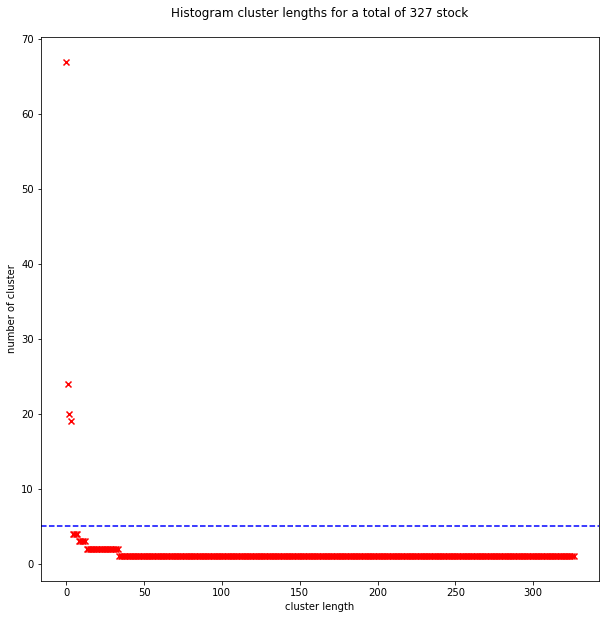

[67, 24, 20, 19, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
plot_cluster_length(all_clusters,5)

In [15]:
get_total_count_clusters_strictly_above_n_items(all_clusters, 5)

There are 4 clusters in total that contain more than 5 items


4

The leading stock in the largest cluster is V. It contains 67 stocks

The 10 most correlated stocks for V are:
MA       0.823934
FISV     0.680506
PFG      0.680460
WFC      0.674823
MMC      0.670237
GS       0.664900
AFL      0.664021
BRK-B    0.656161
AMP      0.654101
TMK      0.650184
Name: V, dtype: float64


The 10 least correlated stocks for V are:
NEM     0.100400
WFM     0.114922
NRG     0.117099
RIG     0.130671
CHK     0.148371
SWN     0.157013
KORS    0.162580
RRC     0.179782
HUM     0.184213
URBN    0.189125
Name: V, dtype: float64



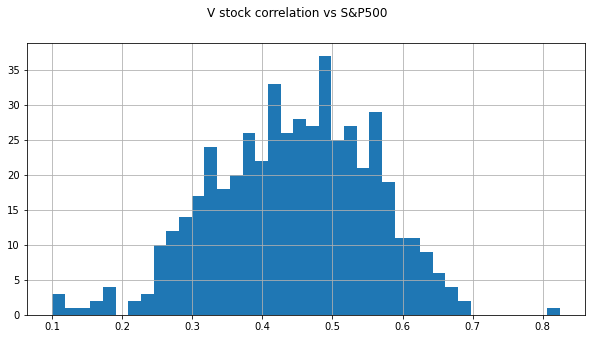

In [16]:
leader_name, followers_count, symbols = get_stock_leader_for_most_dense_cluster(all_clusters)

if followers_count>10:
    top_corr_with_leader = n_top_and_bot_corr(leader_name, 10)[0] # get top only
elif followers_count>0:
    top_corr_with_leader = n_top_and_bot_corr(leader_name, followers_count)[0] # get top only


***
The below code cell is notably inspired from the demo code of ASIM ISLAM available on Kaggle at the following link: https://www.kaggle.com/code/asimislam/stock-performance-with-yahoo-finance-yfinance


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 4.9.2 requires ruamel_yaml>=0.11.14, which is not installed.


  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
V	- financial information downloaded
MA	- financial information downloaded
FISV	- financial information downloaded
PFG	- financial information downloaded
WFC	- financial information downloaded
MMC	- financial information downloaded
GS	- financial information downloaded
AFL	- financial information downloaded
BRK-B	- financial information downloaded
AMP	- financial information downloaded
TMK	- financial information downloaded
symbol list before filering data
['V', 'MA', 'FISV', 'PFG', 'WFC', 'MMC', 'GS', 'AFL', 'BRK-B', 'AMP', 'TMK']
removing TMK from symbols because of insufficient data
symbol list after filering data
['V', 'MA', 'FISV', 'PFG', 'WFC', 'MMC', 'GS', 'AFL', 'BRK-B', 'AMP']
[********************

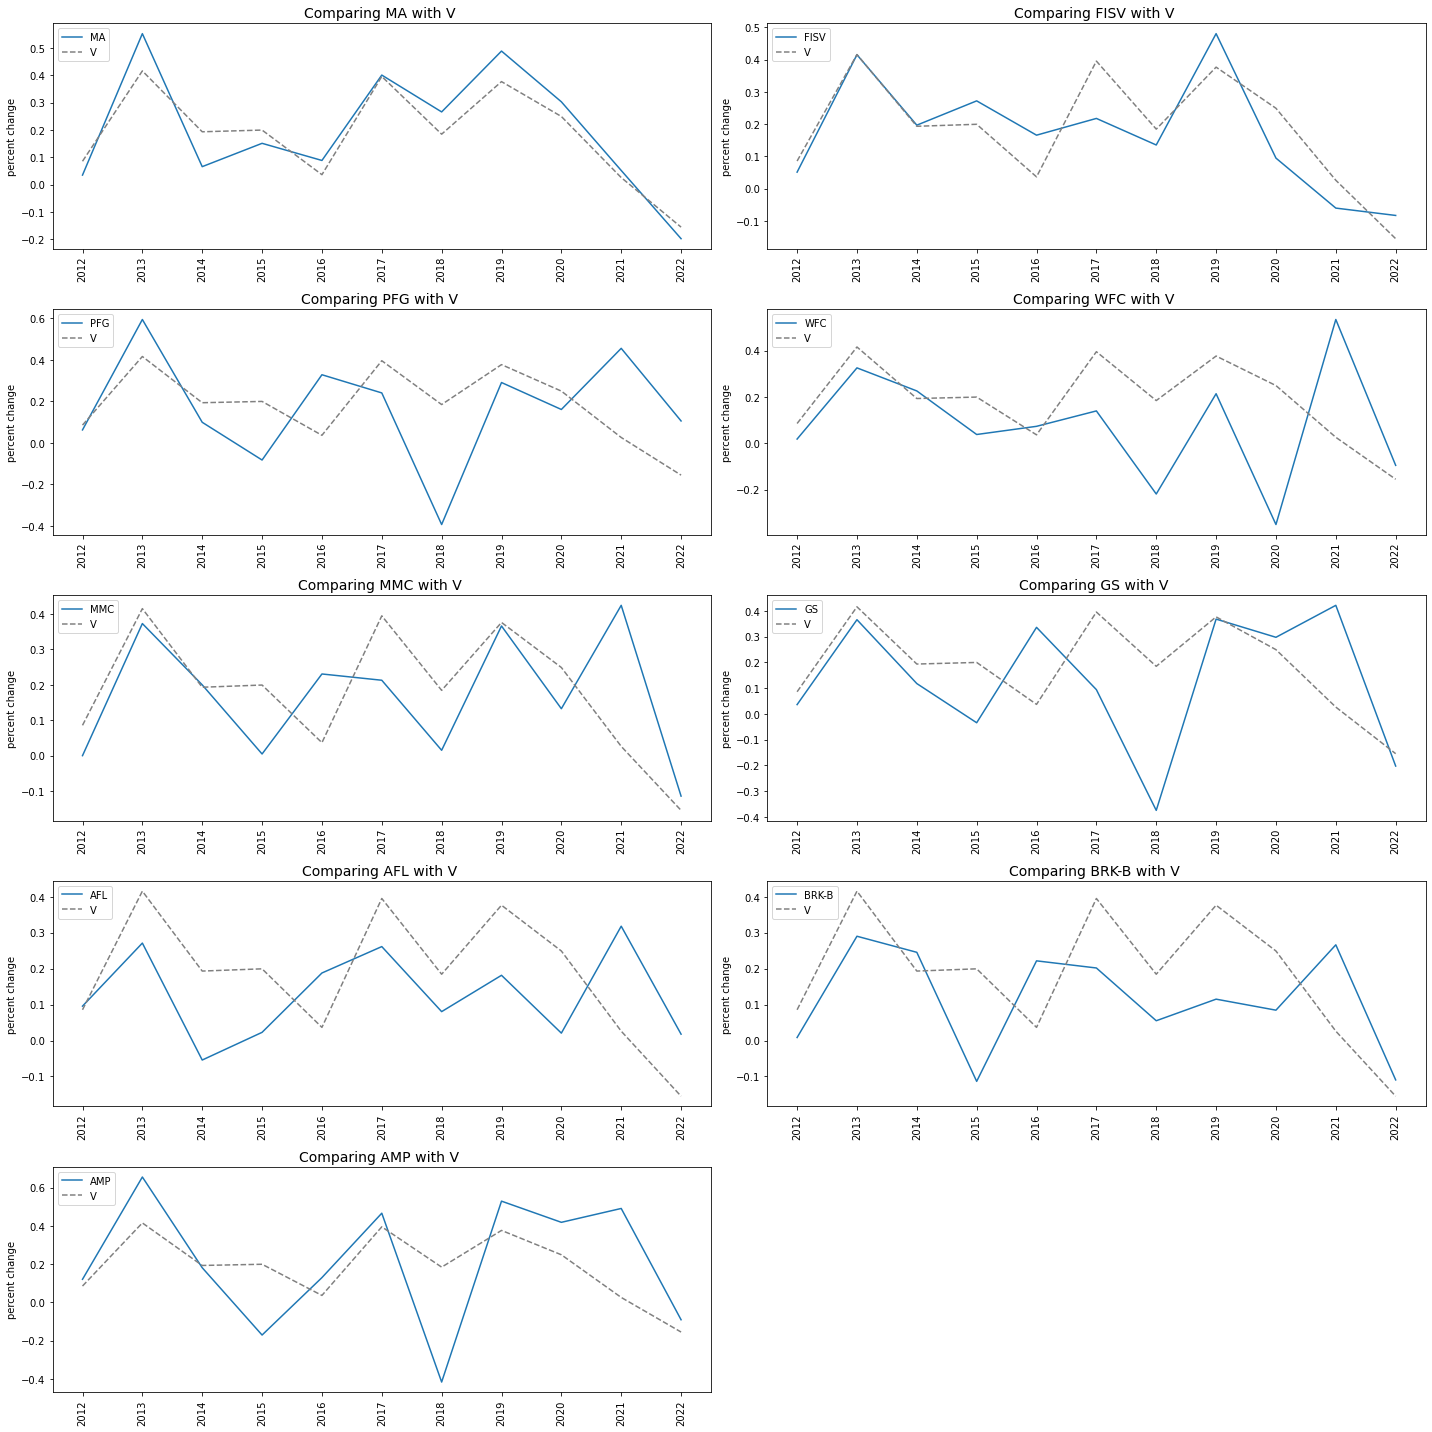

In [24]:
try:
    import yfinance as yf 
except:
    !pip install yfinance
    import yfinance as yf 


symbols = [leader_name] + list(top_corr_with_leader.index ) # list of stock ticker that will be analysed
                                                            # note that we are only taking at most the top 
                                                            # 10 most correlated stocks of the cluster 
                                                            # because we want to run the algo fast and
                                                            # downloading stock information from yahoo 
                                                            # finance can take time

yf_period   = "10y" # get historical data of the last 10 years

yf_interval = "1d"  # at interval of 1 day (daily), as done in 
                    # previous parts of this project
    
stock_parameters = ["shortName",                # we are selecting shortName to quickly identify the stocks 
                                                # since using the ticker might not always be enough for a 
                                                # person that does not read the stock market everyday to be 
                                                # able to seamlessly recognise the stock. Also, because if 
                                                # in this study we'd like to scrape data from the web, it 
                                                # might be easier to do so using the shortName
                    
                    "sector", "industry",       # Grouping stocks by sector and/or industry should in theory
                                                # show high correlation between the groups. It could also show
                                                # non-systematic risk common to all stocks from the same industry.
                                                # This risk could be diversified by combining stocks from other 
                                                # industries (preferably combining stocks coming from poorly
                                                # correlated sectors and industries)
                    
                    "exchange",                 # Just like sector and industry, diversifiable risk should in theory
                                                # be common to all stocks coming from the same stock exchange.
                    
                    "totalAssets", "marketCap", # If we want to combine stocks in a portfolio, the portfolio weights
                                                # could be computed using the marketCap (or potentially totalAssets?)
                    
                    "beta",                     # So far this study presented ideas and algorithms to evaluate the
                                                # correlate of assets with other assets. Beta could be used to not
                                                # only compute the riskiness of assets but also evaluate the correlation
                                                # between assets and the market as a whole
                    
                    "volume", "averageVolume"]  # volume and averageVolume could be used as a way to diversify portfolios but also to
                                                # evaluate the riskiness of assets

# df containing the parameters' (stock_parameters) information for each stock in symbols
yf_info = pd.DataFrame(index = stock_parameters, columns = symbols)

# download financial information for each item of a stock name list (symbols)
for symbol in symbols:
    info = []             
    t = yf.Ticker(symbol)   
    for param in stock_parameters:
        try:      
            info.append(t.info[param])
        except:   
            info.append("")
    yf_info[symbol] = info
    print('{}\t- financial information downloaded'.format(symbol))

# verify that the data downloaded is valid. If not, delete.
# valid data could mean many things. Here it meand that it 
# fills the following requirement:
# the data must not contain more than 5 empty values
symbols_to_drop = []
print("symbol list before filering data")
print(symbols)
for s in symbols:
    cnt_null = 0
    for info_data in yf_info[s]:
        if info_data == None or info_data == '':
            cnt_null += 1
    if cnt_null > 5:
        if s == leader_name:
            print("ERROR: leader stock data is required but not available or outdated on yahoo finance.")
            break
        print("removing {} from symbols because of insufficient data".format(s))
        yf_info.drop(s, axis=1, inplace=True)
        symbols_to_drop.append(s)

for sd in symbols_to_drop:
    symbols.remove(sd)

print("symbol list after filering data")
print(symbols)

# Download historical data
yf_price = yf.download(
        tickers = symbols,       
        period = yf_period,      
        interval = yf_interval,  # fetch data by interval
        group_by = 'ticker',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close) automatically
        prepost = True,          # download market hours data
)

# Get close price out of OHLC data
yf_price = yf_price.iloc[:, yf_price.columns.get_level_values(1) == 'Close']

yf_price = yf_price[symbols]   # change order of columns following the order of the symbol list

# Columns currently have two titles. Their symbol and "Close". Since all the stocks are all Close,
# then the second title ("Close") is redundant and can be removed just like the below line of code.
yf_price.columns = yf_price.columns.droplevel(1)  

# Percent return calculations just like in part 1:
yf_daily_return = yf_price[symbols].pct_change()

yf_daily_return['Year'] = pd.to_datetime(yf_daily_return.index).strftime("%Y")
yf_daily_return['YYYY-MM'] = pd.to_datetime(yf_daily_return.index).strftime("%Y-%m")

yf_daily_return.tail(3)

# Again, like in the previous part, let's compute the highest stock return for a given period of time
# Highest stock return of the year:
highest_stock_year = pd.DataFrame() 

# sort by year and do not take any redundant yearly value (e.g. if the year 2020
# appears 252 times in the daily_return df, it will only appear once it this df.)
highest_stock_year['Year'] = yf_daily_return['Year'].sort_values().unique()

# feed the df with data
# the yealy returns are just the sum of the daily returns for a given year.
for symbol in symbols:
    highest_stock_year[symbol] = yf_daily_return[symbol].groupby(yf_daily_return['Year']).sum().values

print("yearly returns with highes return stock of the year Dataframe:\n")
print(highest_stock_year)

# Add a "Total" row to get the total returns of the stocks for the given time period (e.g. 10 years)
highest_stock_year.loc['total'] = highest_stock_year.sum(numeric_only = True, axis = 0)
highest_stock_year.loc['total', 'Year'] = '' # add a blank in the cell highest_stock_year,loc['total', 'Year']
                                             # because we do not want to add the years
    
# "maxSYM"  - symbol of best performing stock for time period
# "max"     - return of best performing stock for time period

# Compute the highest return for each year and the total maximum return, and assign the 
# relevant stock symbol to that maximum
highest_stock_year['stock of the year'] = highest_stock_year[symbols].idxmax(axis=1)
highest_stock_year['max']   = highest_stock_year[symbols].max(axis=1)

print("\n\nDF of the highest stock returns per year with best stock of the year:\n")
print(highest_stock_year)

#Plotting to compare:
highest_stock_year_plot = highest_stock_year[symbols].head(-1)
highest_stock_year_plot['Year'] = highest_stock_year['Year'].head(-1)

#  subplot
c = 2 # columns for subplot
r = int((len(symbols))/c)   # rows for subplot
s = 1                         # initialize subplot counter
fig_y = 20               # multiple may need to be modified


plt.figure(figsize=(20, 20))

#  subplot loop
for i in symbols:
    if i != leader_name:
        plt.subplot(r,c,s)
        sns.lineplot(x = highest_stock_year_plot['Year'], y = highest_stock_year_plot[i])
        sns.lineplot(x = highest_stock_year_plot['Year'], y = highest_stock_year_plot[leader_name], color='gray',ls='--')
        plt.legend([i, leader_name],loc=2)  # top left
        plt.title('Comparing {} with {} '.format(i,leader_name), fontsize=14)
        plt.xlabel('')
        plt.ylabel('percent change')
        plt.xticks(rotation=90)
        s = s + 1  # increment subplot counter

plt.tight_layout()
plt.show()



### Exploring other clustering methods

We've used just one approach to clustering, and arguably not the best one. Research clustering algorithms and libraries to apply them in Python. Discuss some other algorithms that could be used, and how they differ from the one we've implemented. Look at the Python library `scikit-learn`. How would we apply the clustering algorithms provided by the library to stock price data? Would we need to develop new metrics other than correlations? If we want to go even further,  try running some of these other clustering algorithms on our data, and report the results. Start from here: http://scikit-learn.org/stable/modules/clustering.html#clustering; we'll find a stock market example there too. For future reference, we may also find other interesting machine-learning tools for both stock market analysis or other analytics purposes.



Here we want to define clusters based on the correlation matrix we created. As it is said in the scikit-learn presentation of clustering methods : Affinity Propagation can be interesting as it chooses the number of clusters based on the data provided. We will try to use the solution provided by scikit-learn on our data bellow.


## Learning a graph structure

We use sparse inverse covariance estimation to find which quotes are
correlated conditionally on the others. Specifically, sparse inverse
covariance gives us a graph, that is a list of connection. For each
symbol, the symbols that it is connected too are those useful to explain
its fluctuations.



In [25]:
from sklearn import covariance
daily_returns=daily_return
variation = daily_returns.values

alphas = np.logspace(-1.5, 1, num=10)

edge_model = covariance.GraphicalLassoCV(alphas=alphas)

# standardize the time series: using correlations rather than covariance
# former is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
print(X.shape)
edge_model.fit(X.T)

(496, 251)


C:\Users\n\anaconda\lib\site-packages\sklearn\covariance\_graph_lasso.py:291: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
C:\Users\n\anaconda\lib\site-packages\sklearn\covariance\_graph_lasso.py:292: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs
C:\Users\n\anaconda\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


GraphicalLassoCV(alphas=array([ 0.03162278,  0.05994843,  0.11364637,  0.21544347,  0.40842387,
        0.77426368,  1.46779927,  2.7825594 ,  5.27499706, 10.        ]))

## Clustering using affinity propagation

We use clustering to group together quotes that behave similarly. Here,
amongst the `various clustering techniques <clustering>` available
in the scikit-learn, we use `affinity_propagation` as it does
not enforce equal-size clusters, and it can choose automatically the
number of clusters from the data.

Note that this gives us a different indication than the graph, as the
graph reflects conditional relations between variables, while the
clustering reflects marginal properties: variables clustered together can
be considered as having a similar impact at the level of the full stock
market.



In [26]:
from sklearn import cluster

_, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=0)
n_labels = labels.max()
for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(names[labels == i])}")

Cluster 1: MMM, ACN
Cluster 2: ABBV, CME, F, MCHP, NTAP, NKE, SYMC
Cluster 3: GOOGL, GOOG, ADM, ES
Cluster 4: ALK, AAL, DAL, ISRG, MAC, SNA, LUV, UAL, WY
Cluster 5: ABC, ADSK, GIS, MCK, WMT
Cluster 6: ANTM, EBAY, ETR, MS, ORLY, XL
Cluster 7: MO, AON, CHRW, CBS, KSS, PSA, O
Cluster 8: BAC
Cluster 9: AMP, BDX, BA, CB, ED, NOC, RCL, SJM
Cluster 10: AVB, BBY
Cluster 11: BXP, DTE, MON, UHS, VMC
Cluster 12: ATVI, BMY, KSU, NTRS, STI, USB, WM
Cluster 13: ALL, CA, JWN, RAI
Cluster 14: AET, CNC, EL, HBAN, SPGI
Cluster 15: AMAT, CTL, ESRX, HUM, LUK, MNST, PKI, WBA
Cluster 16: AWK, CERN, JBHT, PNC
Cluster 17: CPB, SCHW, DLR, ETFC, MAR
Cluster 18: CHD, GGP, LOW, MAT, RF, VRSN, VIAB
Cluster 19: AAP, CSCO, GPN, LKQ, PBI, RL, PX, TWX
Cluster 20: ADBE, LNT, COF, C
Cluster 21: AES, DHI, LEG, LEN, PHM
Cluster 22: A, KMX, COST, DHR, ESS, TSCO, TYC, WAT
Cluster 23: BF-B, DE, DFS, FTR, KEY, MCD, NI
Cluster 24: AMT, DISCA, DISCK, GS
Cluster 25: CTSH, EXR, HSY
Cluster 26: EQR, FAST, IPG, SNI, SIG, TGNA, FOXA